<a href="https://colab.research.google.com/github/edwiniac/CrackDetection/blob/main/NN_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

np.random.seed(1) # 

In [3]:
X, Y = load_planar_dataset()

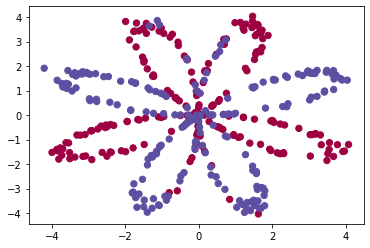

In [4]:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

In [5]:
X.shape[0]

2

In [6]:
X.size

800

In [7]:
def layer_sizes(X,Y):
  n_x=X.shape[0]
  n_h=4
  n_y=Y.shape[0]
  return n_x,n_h,n_y

In [8]:
n_x,n_h,n_y=layer_sizes(X,Y)

In [11]:
def initialise_parameters(n_x,n_h,n_y):
  W1=np.random.randn(n_h,n_x)*0.01
  b1=np.zeros((n_h,1))
  W2=np.random.randn(n_y,n_h)*0.01
  b2=np.zeros((n_y,1))

  assert W1.shape==(n_h,n_x)
  assert b1.shape==(n_h,1)
  assert W2.shape==(n_y,n_h)
  assert b2.shape==(n_y,1)

  parameters={
      'W1':W1,
      'b1':b1,
      'W2':W2,
      'b2':b2
  }

  return parameters

In [12]:
parameters=initialise_parameters(n_x,n_h,n_y)

In [22]:
print(f"w1 is {parameters['W1']}")

w1 is [[ 0.00814343  0.0078047 ]
 [-0.01464054 -0.00154491]
 [-0.00092432 -0.00237875]
 [-0.00755663  0.01851438]]


In [31]:
def forward_prop(X,parameters):
  W1=parameters['W1']
  b1=parameters['b1']
  W2=parameters['W2']
  b2=parameters['b2']

  Z1=np.dot(W1,X)+b1
  A1=np.tanh(Z1)
  Z2=np.dot(W2,A1)+b2
  A2=sigmoid(Z2)

  assert A2.shape==(1,X.shape[1])

  cache={
      'Z1':Z1,
      'A1':A1,
      'Z2':Z2,
      'A2':A2
  }

  return A2,cache

In [32]:
A2,cache=forward_prop(X,parameters)

In [35]:
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

0.0005461995964726417 0.0005459118134789448 -7.657466130090648e-06 0.49999808563373704


In [48]:
def compute_cost(Y,A2,parameters):
  m=Y.shape[1]
  logprobs=np.multiply(Y,np.log(A2)) + np.multiply((1-Y),np.log(1-A2))
  cost=(-1/m)*np.sum(logprobs)
  cost =float(np.squeeze(cost))
  assert isinstance(cost,float)
  return cost

In [49]:
cost=compute_cost(Y,A2,parameters)

In [56]:
cost

0.6931125167719424

In [74]:
def backward_prop(parameters,cache,X,Y):
  m=X.shape[1]

  W1=parameters['W1']
  b1=parameters['b1']
  W2=parameters['W2']
  b2=parameters['b2']

  Z1=cache['Z1']
  A1=cache['A1']
  Z2=cache['Z2']
  A2=cache['A2']

  dZ2=A2-Y
  dW2=(1/m)*np.dot(dZ2,A1.T)
  db2=(1/m)*np.sum(dZ2,keepdims=True,axis=1)
  dZ1=np.dot(W2.T,dZ2)*(1-np.power(A1,2))
  dW1=(1/m)*np.dot(dZ1,X.T)
  db1=(1/m)*np.sum(dZ1,keepdims=True,axis=1)

  grads ={
      'db2':db2,
      'dW2':dW2,
      'db1':db1,
      'dW1':dW1
  }

  return grads

In [75]:
grads=backward_prop(parameters,cache,X,Y)

In [76]:
grads['db1']

array([[-1.19216713e-08],
       [ 1.39568414e-07],
       [ 1.09077696e-08],
       [-5.48251244e-07]])

In [79]:
def update_parameters(parameters,grads,lr):
  W1=parameters['W1']
  b1=parameters['b1']
  W2=parameters['W2']
  b2=parameters['b2']

  dw2=grads['dW2']
  db2=grads['db2']
  dw1=grads['dW1']
  db1=grads['db1']

  W1=W1-lr*dw1
  b1=b1-lr*db1
  W2=W2-lr*dw2
  b2=b2-lr*db2

  parameters={
      'W1':W1,
      'b1':b1,
      'W2':W2,
      'b2':b2
  }

  return parameters


In [80]:
parameters=update_parameters(parameters,grads,1.0)

In [82]:
def nn_model(X,Y,n_h,lr,num_iteration=10000,print_cost=False):
  n_x=layer_sizes(X,Y)[0]
  n_y=layer_sizes(X,Y)[2]

  # Initialize parameters
  parameters = initialise_parameters(n_x, n_h, n_y)
  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]

  for i in range(0,num_iteration):
    A2,cache=forward_prop(X,parameters)
    cost=compute_cost(Y,A2,parameters)
    grads=backward_prop(parameters,cache,X,Y)
    parameters=update_parameters(parameters,grads,1.0)
    if print_cost and i % 1000 == 0:
      print("Cost after iteration %i: %f" %(i, cost))

  return parameters




In [90]:
parameters=nn_model(X,Y,4,1.0,num_iteration=20000,print_cost=True)

Cost after iteration 0: 0.693210
Cost after iteration 1000: 0.285140
Cost after iteration 2000: 0.272310
Cost after iteration 3000: 0.265160
Cost after iteration 4000: 0.260312
Cost after iteration 5000: 0.256857
Cost after iteration 6000: 0.254301
Cost after iteration 7000: 0.252350
Cost after iteration 8000: 0.250819
Cost after iteration 9000: 0.249590
Cost after iteration 10000: 0.248586
Cost after iteration 11000: 0.247750
Cost after iteration 12000: 0.247044
Cost after iteration 13000: 0.246441
Cost after iteration 14000: 0.245918
Cost after iteration 15000: 0.245461
Cost after iteration 16000: 0.245057
Cost after iteration 17000: 0.244697
Cost after iteration 18000: 0.244374
Cost after iteration 19000: 0.244080


In [104]:
def predict(parameters, X):
    A2, cache = forward_prop(X, parameters)
    predictions = (A2 > 0.5)
    return predictions

In [101]:
X_test=np.array([[ 1.62434536, -0.61175641, -0.52817175],
       [-1.07296862,  0.86540763, -2.3015387 ]])

In [103]:
predictions=predict(parameters,X_test)

In [106]:
print("predictions mean = " + str(np.mean(predictions)))


predictions mean = 0.6666666666666666


In [108]:
parameters = nn_model(X, Y, 4, 1.2 , num_iteration = 10000, print_cost=True)


Cost after iteration 0: 0.693145
Cost after iteration 1000: 0.292073
Cost after iteration 2000: 0.275699
Cost after iteration 3000: 0.239802
Cost after iteration 4000: 0.230739
Cost after iteration 5000: 0.225869
Cost after iteration 6000: 0.222579
Cost after iteration 7000: 0.220111
Cost after iteration 8000: 0.218146
Cost after iteration 9000: 0.216535


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

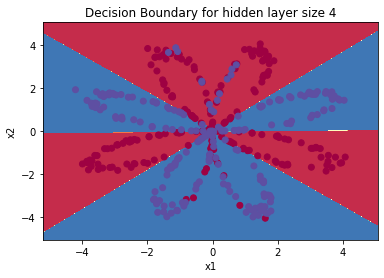

In [109]:
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [110]:
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()


In [111]:
datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

In [112]:
dataset = "noisy_moons"


In [113]:
X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

Cost after iteration 0: 0.693144
Cost after iteration 1000: 0.048652
Cost after iteration 2000: 0.032034
Cost after iteration 3000: 0.027400
Cost after iteration 4000: 0.024837
Cost after iteration 5000: 0.023058
Cost after iteration 6000: 0.021679
Cost after iteration 7000: 0.020565
Cost after iteration 8000: 0.019646
Cost after iteration 9000: 0.018867


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

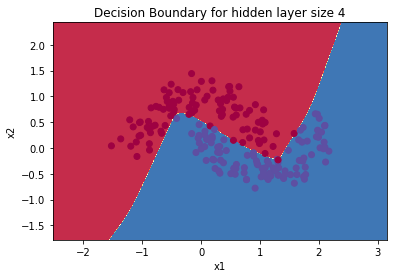

In [114]:
parameters = nn_model(X, Y, 4, 1.2 , num_iteration = 10000, print_cost=True)
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))